### 경희대학교 산업경영공학과 김태호(2015100915)

# 한국전력거래소 17년간 발전실적 분석및 예측

* 한국전력거래소의 2001년부터 2017년까지의 발전실적을 가져와 시간의 흐름에 따른 변화를 살펴보고 앞으로의 발전 실적에 대해 예측을 해본다.
* 시계열데이터를 fbprophet이라는 모듈을 사용하여 분석하여 예측해 본다.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [62]:
electric_sending = pd.read_csv('../data/2001년_이후_일별_송전단실적_총합_정보.csv', engine= 'python') 
electric_sending = electric_sending[electric_sending[' 송전단실적 합계(MWh)'].notnull()] # null 값 없애기
electric_sending.head()

,년,월,일,송전단실적 합계(MWh)
0,2001,4,1,606955.2747
1,2001,4,2,719433.3379
2,2001,4,3,738837.1730
3,2001,4,4,727158.4834
4,2001,4,5,681998.4485


In [63]:
electric_sending['date'] = electric_sending['년'].apply(lambda x : str(x)) +'-' \
                            + electric_sending['월'].apply(lambda x : str(x)) +'-' \
                            + electric_sending['일'].apply(lambda x : str(x))
del electric_sending["년"]
del electric_sending["월"]
del electric_sending["일"]
electric_sending.head()

,송전단실적 합계(MWh),date
0,6.069553e+05,2001-4-1
1,7.194333e+05,2001-4-2
2,7.388372e+05,2001-4-3
3,7.271585e+05,2001-4-4
4,6.819984e+05,2001-4-5
5,7.094557e+05,2001-4-6
6,6.800796e+05,2001-4-7
7,6.025050e+05,2001-4-8
8,6.797982e+05,2001-4-9
9,7.060923e+05,2001-4-10


In [64]:
electric_sending_1 = electric_sending.set_index("date")
electric_sending_1.head()

,송전단실적 합계(MWh)
date,
2001-4-1,606955.2747
2001-4-2,719433.3379
2001-4-3,738837.1730
2001-4-4,727158.4834
2001-4-5,681998.4485


#### 17년간 송전단실적 변화 추이를 그래프로 나타내어 본다

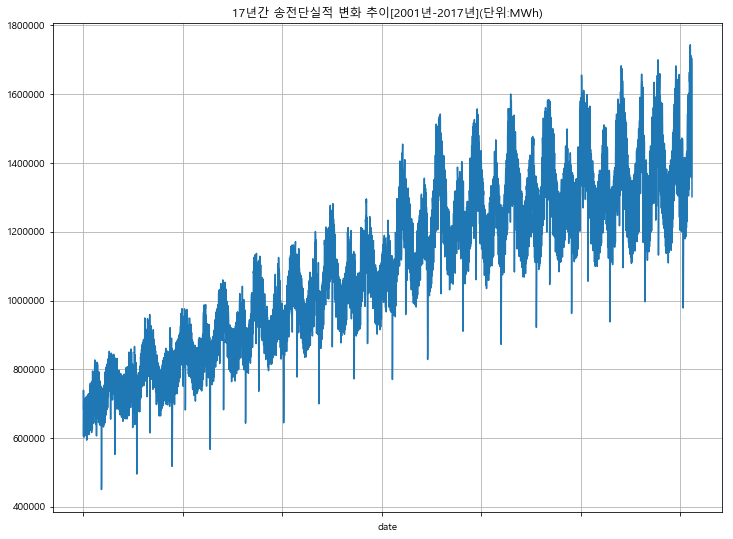

In [90]:
electric_sending_1[' 송전단실적 합계(MWh)'].plot(figsize=(12,9), grid=True,title = "17년간 송전단실적 변화 추이[2001년-2017년](단위:MWh)");

### 17년간의 데이터를 이용하여 선형 회귀 분석을 해본다

In [71]:
time = np.arange(0,len(electric_sending_1))
MWh = electric_sending_1[' 송전단실적 합계(MWh)'].values

fx = np.linspace(0, time[-1], 1000)
fp1 = np.polyfit(time, MWh, 1)
f1 = np.poly1d(fp1)
fp1

array([1.23816187e+02, 7.45179273e+05])

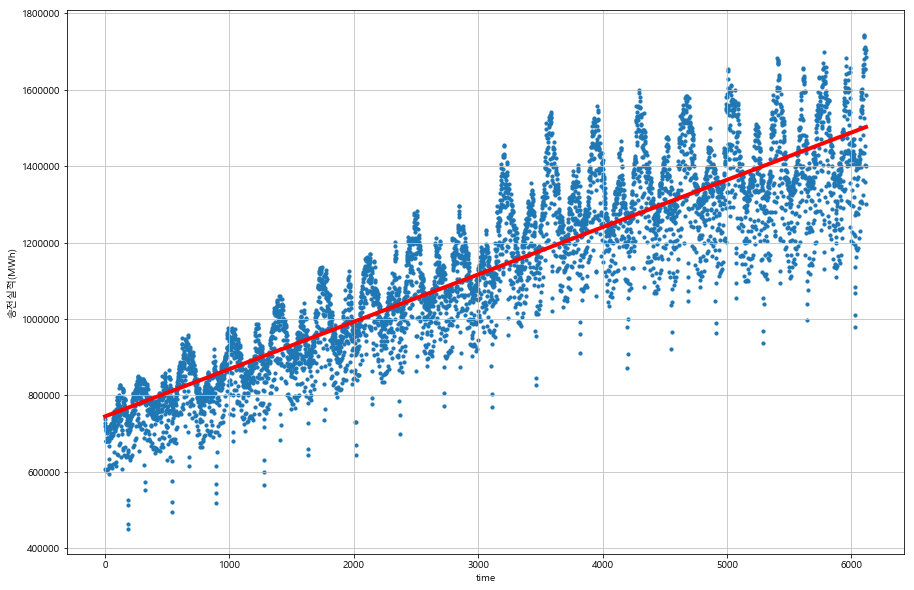

In [109]:
plt.figure(figsize=(15,10))
plt.scatter(time, MWh, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1',c = 'red')
plt.xlabel("time") 
plt.ylabel("송전실적(MWh)") 

plt.grid(True, linestyle='-', color='0.75')

plt.show()

### 17년간의 데이터를 이용하여 2018년도의 송전량을 예측해본다.

In [102]:
df = pd.DataFrame({'ds':electric_sending["date"], 'y':electric_sending[' 송전단실적 합계(MWh)']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'])


m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [103]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
6479,2018-12-27
6480,2018-12-28
6481,2018-12-29
6482,2018-12-30
6483,2018-12-31


In [105]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6479,2018-12-27,1.592441e+06,1.511890e+06,1.670860e+06
6480,2018-12-28,1.588012e+06,1.512791e+06,1.660921e+06
6481,2018-12-29,1.506943e+06,1.428594e+06,1.577516e+06
6482,2018-12-30,1.424124e+06,1.352407e+06,1.499014e+06
6483,2018-12-31,1.559662e+06,1.479290e+06,1.635239e+06


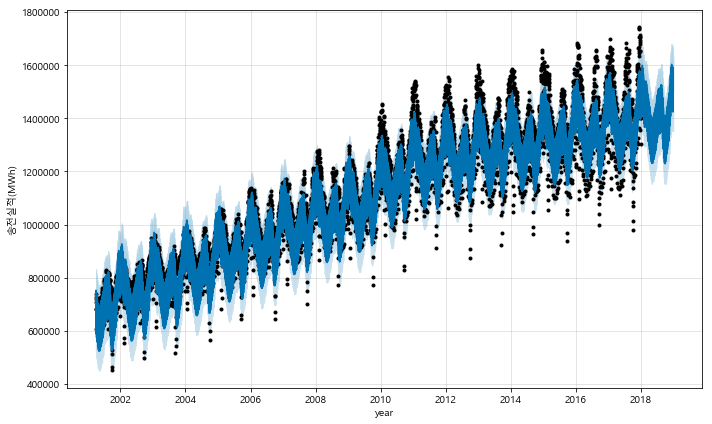

In [110]:
m.plot(forecast,xlabel = "year",ylabel="송전실적(MWh)");

#### 예측한 그래프를 보면 2018년에도 그전과 비슷하게 상승하고 있는 것을 알 수 있다.

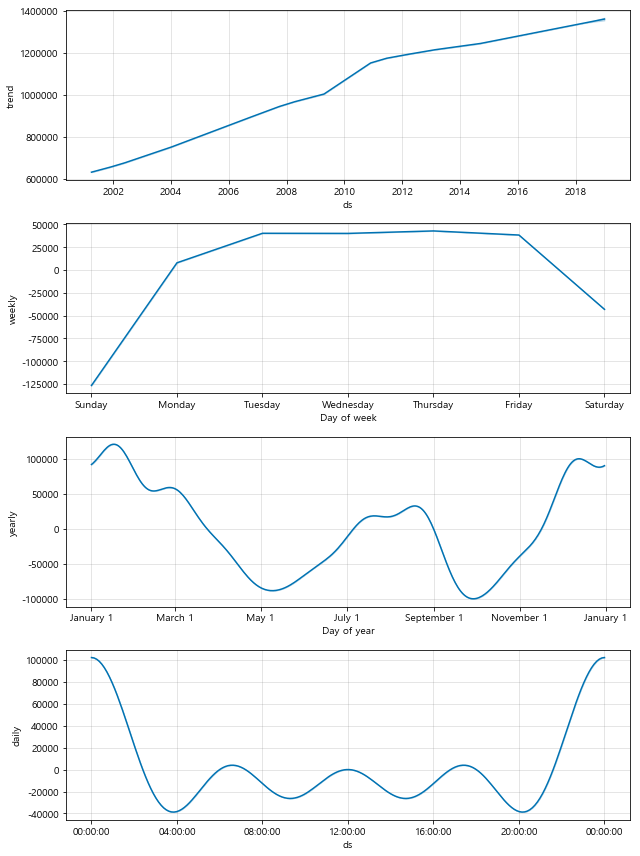

In [107]:
m.plot_components(forecast);

### 결론

#### trend를 보면 2009년에 갑작스럽게 양이 늘어난 구간을 제외하고는 송전량이 꾸준한 양으로 증가하고있다.
#### 주말에는 주중에비해 송전량이 적은 것으로 보아 직원들이 많이 출근하지 않는 주말에는 송전량이 적은 것으로 추측할 수 있다.
#### 1년간의 추세를 보면 겨울과 여름에 송전량이 많은 것으로 보아 에어컨이나 난방기구를 많이 작동하기 때문이라고 추측할 수 있다.
#### 제일 아래에 daily 그래프는 관련된 data가 없으므로 필요 없는 그래프이다. 